# Векторные модели. Word2Vec

+ Firth (1957:11):
You shall know a word by the company it keeps . . .

+ Дистрибутивная гипотеза: значение слова определяется его контекстом — иначе говоря, словами, которые встречаются рядом с этим словом в тексте. 

+ Область лингвистики, которая занимается вычислением степени семантической близости между словами/текстами и т.п. на основании их распределения (дистрибуции) в больших массивах данных (текстовых корпусах) назвается **дистрибутивной семантикой**.

## Кратко о существующих системах

**GloVe**

GloVe берет и строит полную матрицу совместной встречаемости и после этого с помощью алгоритмов уменьшения размерности преобразует ее так, чтобы вектора были опредленной длины


**Word2Vec**

Это уже нейросеть и она на основе корпуса постепенно подбирает коэффициенты (значения в векторах) для каждого слова так, чтобы с помощью них можно было наилучшим образом предсказывать слова по контексту

**FastText**

Если мы берем конкретные слова, мы не можем ничего сказать о тех, что нам не встретились (например, уже видели вагон и строитель, а вот вагоностроителя у нас не было). Если мы возьмем слова не целиком, а в виде будквенных нграмм, то мы сможем сложить неизвестные слова.

**AdaGram**

Все предыдущие модели основаны на графических оболочках и не учитывают многозначность и омонимию. Есть только один вектор для слова "ключ" и мы ничего с этим не можем сделать. AdaGram исходит из предположения, что у слова есть n вариантов и если они действительно отличаются и достаточно часто встречаются, он умеет их разделить.

**BERT и ELMo**

Эти модели не просто могут отличить значения слов, но и скорректировать их вектора в зависимости от контекста, например, понять, что в отрывках “чистый ключ в лесной чаще” и “ключ от квартиры” совсем разные “ключи”. https://habr.com/ru/post/487358/

### Word2Vec

Одной из самых известных моделей для работы с дистрибутивной семантикой является word2vec. Технология основана на нейронной сети, предсказывающей вероятность встретить слово в заданном контексте. Этот инструмент был разработан группой исследователей Google в 2013 году, руководителем проекта был Томаш Миколов. Вот две самые главные статьи:

+ [Efficient Estimation of Word Representations inVector Space](https://arxiv.org/pdf/1301.3781.pdf)
+ [Distributed Representations of Words and Phrases and their Compositionality](https://arxiv.org/abs/1310.4546)

Полученные таким образом вектора называются распределенными представлениями слов, или **эмбеддингами**.

#### Как это обучается?

Мы задаём вектор для каждого слова с помощью матрицы $w$ и вектор контекста с помощью матрицы $W$. По сути, word2vec является обобщающим названием для двух архитектур Skip-Gram и Continuous Bag-Of-Words (CBOW).

+ **CBOW** предсказывает текущее слово, исходя из окружающего его контекста.

+ **Skip-gram**, наоборот, использует текущее слово, чтобы предугадывать окружающие его слова.
  

![cbow_skip-gram](./cbow_skip-gram.png)


#### Как это работает?

Word2vec принимает большой текстовый корпус в качестве входных данных и сопоставляет каждому слову вектор, выдавая координаты слов на выходе. Сначала он создает словарь, «обучаясь» на входных текстовых данных, а затем вычисляет векторное представление слов. Векторное представление основывается на контекстной близости: слова, встречающиеся в тексте рядом с одинаковыми словами (а следовательно, согласно дистрибутивной гипотезе, имеющие схожий смысл), в векторном представлении будут иметь близкие координаты векторов-слов. Для вычисления близости слов используется косинусное расстояние между их векторами.

С помощью дистрибутивных векторных моделей можно строить семантические пропорции (они же аналогии) и решать примеры:

+ король: мужчина = королева: женщина $\Rightarrow$
+ король - мужчина + женщина = королева

![w2v](https://cdn-images-1.medium.com/max/2600/1*sXNXYfAqfLUeiDXPCo130w.png)

Ещё про механику с картинками [тут](https://habr.com/ru/post/446530/)

#### Зачем это нужно?

+ используется для решения семантических задач
+ давайте подумаем, для описания каких семантических классов слов дистрибутивная информация особенно важна?
+ несколько интересных статей по дистрибутивной семантике:

* [Turney and Pantel 2010](https://jair.org/index.php/jair/article/view/10640)
* [Lenci 2018](https://www.annualreviews.org/doi/abs/10.1146/annurev-linguistics-030514-125254?journalCode=linguistics)
* [Smith 2019](https://arxiv.org/pdf/1902.06006.pdf)
* [Pennington et al. 2014](https://www.aclweb.org/anthology/D14-1162/)
* [Faruqui et al. 2015](https://www.aclweb.org/anthology/N15-1184/)

+ подаётся на вход нейронным сетям
+ используется в Siri, Google Assistant, Alexa, Google Translate...

#### Gensim

Использовать предобученную модель эмбеддингов или обучить свою можно с помощью библиотеки `gensim`. Вот ее [документация](https://radimrehurek.com/gensim/models/word2vec.html).

Если gensim у вас не стоит, то ставим: `pip install gensim`. 

`Gensim` регулярно обновляется, так что не будет лишним удостовериться, что у вас установлена последняя версия, а при необходимости проапдейтить библиотеку:

`pip install gensim --upgrade`

или

`pip install gensim -U`

Поскольку обучение и загрузка моделей могут занимать продолжительное время, иногда бывает полезно вести лог событий. Для этого используется стандартная питоновская библиотека `logging`.


In [1]:
import sys
import gensim, logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [23]:
# Импортируем библиотеки Word2Vec
from gensim.models.word2vec import Word2Vec # Собственно модель.
from gensim.models import KeyedVectors # Семантические вектора.

import numpy as np

#### Как обучить свою модель

NB! Обратите внимание, что тренировка модели не включает препроцессинг! Это значит, что избавляться от пунктуации, приводить слова к нижнему регистру, лемматизировать их, проставлять частеречные теги придется до тренировки модели (если, конечно, это необходимо для вашей задачи). Т.е. в каком виде слова будут в исходном тексте, в таком они будут и в модели.

Инициализируем модель. Основные параметры:

+ данные должны быть итерируемым объектом
+ vector_size — размер вектора,
+ window — размер окна наблюдения,
+ min_count — мин. частотность слова в корпусе,
+ workers — количество ядер вашего процессора, чтоб запустить обучение в несколько потоков.

In [12]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)

model.save("word2vec.model") 

2022-01-28 15:29:50,761 : INFO : collecting all words and their counts
2022-01-28 15:29:50,763 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-01-28 15:29:50,770 : INFO : collected 12 word types from a corpus of 29 raw words and 9 sentences
2022-01-28 15:29:50,771 : INFO : Creating a fresh vocabulary
2022-01-28 15:29:50,773 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 12 unique words (100.0%% of original 12, drops 0)', 'datetime': '2022-01-28T15:29:50.772989', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.144+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'prepare_vocab'}
2022-01-28 15:29:50,773 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 29 word corpus (100.0%% of original 29, drops 0)', 'datetime': '2022-01-28T15:29:50.773732', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.144

In [ ]:
# Финализируем нашу модель. Ее нельзя будет доучить теперь, но она начнет занимать гораздо меньше места
model.init_sims(replace=True)

In [27]:
vector = model.wv['graph']  # get numpy vector of a word

print(vector[:10])

[-0.14864719  0.06321594  0.08949995  0.09902015  0.12876756 -0.10636206
  0.01906639  0.10428586 -0.04897691 -0.10646288]


In [29]:
model.wv.most_similar('human')

[('trees', 0.17272794246673584),
 ('eps', 0.16694682836532593),
 ('response', 0.11118265986442566),
 ('interface', 0.10940766334533691),
 ('system', 0.07963485270738602),
 ('user', 0.04130299761891365),
 ('survey', 0.0377129502594471),
 ('graph', 0.00831594318151474),
 ('minors', -0.0058967843651771545),
 ('computer', -0.0742427185177803)]

In [30]:
model.wv.doesnt_match(['human', 'computer', 'user'])

'computer'

In [33]:
model.wv.most_similar(positive=['user'], negative=['human'])

[('time', 0.0905691534280777),
 ('graph', 0.04305828735232353),
 ('survey', 0.026922456920146942),
 ('eps', -0.025620516389608383),
 ('minors', -0.02801719680428505),
 ('computer', -0.06851557642221451),
 ('interface', -0.06950870156288147),
 ('response', -0.09015342593193054),
 ('trees', -0.13451507687568665),
 ('system', -0.13811412453651428)]

In [34]:
model.wv.similarity('user','computer')

-0.16911626

#### Параметры варьирования

1) препроцессинг -- лемматизировать или нет, например, вдруг мы хотим посмотреть на морфологические пропорции? тогда лемматизировать не нужно

2) размер корпуса -- чем больше, тем лучше, но! не для семантических задач -- для них важнее качество

3) размер словаря

4) negative samples

5) количество итераций

6) длина вектора -- 100-300 (судя по всему, >300 не сильно улучшает результаты)

7) длина окна -- для синтаксических задач, примерно 4, для семантических задач, большое окно, 8, 10.

Хорошая статья про сравнение моделей с варьированием параметров: https://www.aclweb.org/anthology/D14-1162.pdf

#### Как использовать готовую модель

#### RusVectōrēs

На сайте RusVectōrēs (https://rusvectores.org/ru/) собраны предобученные на различных данных модели для русского языка, а также можно поискать наиболее близкие слова к заданному, посчитать семантическую близость нескольких слов и порешать примеры с помощью «калькулятора семантической близости».

Для других языков также можно найти предобученные модели — например, модели [fastText](https://fasttext.cc/docs/en/english-vectors.html) и [GloVe](https://nlp.stanford.edu/projects/glove/)

#### Работа с моделью

Существуют несколько форматов, в которых могут храниться модели. Во-первых, данные могут храниться в нативном формате word2vec, при этом модель может быть бинарной или не бинарной. Для загрузки модели в формате word2vec в классе `KeyedVectors` (в котором хранится большинство относящихся к дистрибутивным моделям функций) существует функция `load_word2vec_format`, а бинарность модели можно указать в аргументе `binary` (внизу будет пример). Помимо этого, модель можно хранить и в собственном формате gensim, для этого существует класс `Word2Vec` с функцией `load`. Поскольку модели бывают разных форматов, то для них написаны разные функции загрузки; бывает полезно учитывать это в своем скрипте. Наш код определяет тип модели по её расширению, но вообще файл с моделью может называться как угодно, жестких ограничений для расширения нет.

Для новых моделей перешли на загрузку с использованием инфраструктуры Nordic Language Processing Laboratory. На практике это означает, что теперь по клику на модель вы скачиваете zip-архив с уникальным числовым идентификатором (например, `220.zip`). Внутри архива всегда находится файл `meta.json`, содержащий в структурированном и стандартном виде информацию о модели и корпусе, на котором она обучена. word2vec-модели лежат в архивах сразу в двух word2vec-форматах: бинарном `model.bin` (удобен для быстрой загрузки) и текстовом `model.txt` (удобен для просмотра человеком). Давайте скачаем [новейшую модель для русского языка](http://vectors.nlpl.eu/repository/20/220.zip) и загрузим в её в память. Распаковывать скачанный архив для обычных моделей не нужно, так как его содержимое прочитается при помощи специальной инструкции:

In [35]:
import zipfile
import wget

model_url = 'http://vectors.nlpl.eu/repository/20/220.zip'
m = wget.download(model_url)
model_file = model_url.split('/')[-1]
with zipfile.ZipFile(model_file, 'r') as archive:
    stream = archive.open('model.bin')
    model = gensim.models.KeyedVectors.load_word2vec_format(stream, binary=True)

2022-01-28 15:49:56,280 : INFO : loading projection weights from <zipfile.ZipExtFile name='model.bin' mode='r' compress_type=deflate>
2022-01-28 15:50:01,494 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (249333, 300) matrix of type float32 from <zipfile.ZipExtFile [closed]>', 'binary': True, 'encoding': 'utf8', 'datetime': '2022-01-28T15:50:01.494571', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.144+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'load_word2vec_format'}


**Мини-исследование**: Давайте протестируем, выделяет ли модель функцию интенсификации в прилагательных? Например, *ужасный курильщик* может интерпретироваться как *человек, который много курит*, а не только как (не столько как) *очень плохой человек-курильщик*. Объединяет ли модель *плохой, ужасный, жуткий, страшный* по отрицательной полярности и объединяет ли она *ужасный, жуткий, страшный* по функции интенсификации?

In [36]:
words = ['хороший_ADJ', 'плохой_ADJ', 'ужасный_ADJ','жуткий_ADJ', 'страшный_ADJ', 'красный_ADJ', 'синий_ADJ']

Частеречные тэги нужны, поскольку это специфика скачанной модели - она была натренирована на словах, аннотированных их частями речи (и лемматизированных). NB! В названиях моделей на `rusvectores` указано, какой тегсет они используют (mystem, upos и т.д.)

Попросим у модели 10 ближайших соседей для каждого слова и коэффициент косинусной близости для каждого:


In [38]:
for word in words:
    # есть ли слово в модели? 
    if word in model:
        print(word)
        # смотрим на вектор слова (его размерность 300, смотрим на первые 10 чисел)
        print(model[word][:10])
        # выдаем 10 ближайших соседей слова:
        for i in model.most_similar(positive=[word], topn=10):
            # слово + коэффициент косинусной близости
            print(i[0], i[1])
        print('\n')
    else:
        # Увы!
        print('Увы, слова "%s" нет в модели!' % word)

хороший_ADJ
[-0.5533533   3.525192    1.3954544   0.50957227  0.9530872   0.42150345
  0.14798506 -0.89938575 -1.9526412  -2.9605858 ]
плохой_ADJ 0.7704135179519653
отличный_ADJ 0.745093822479248
хороший_ADV 0.7096987962722778
неплохой_ADJ 0.7080509662628174
хорошо_ADJ 0.685799777507782
превосходный_ADJ 0.66509610414505
приятный_ADJ 0.6305955052375793
хорошо_ADV 0.6236262321472168
дурной_ADJ 0.5771215558052063
нужный_ADJ 0.5764609575271606


плохой_ADJ
[ 1.47815     3.4967737   0.6200617   0.21216297 -2.1780734  -0.71112794
 -0.55119324 -0.8843036  -1.0574621  -2.4701962 ]
хороший_ADJ 0.7704134583473206
плохой_ADV 0.6875114440917969
дурной_ADJ 0.6704886555671692
плохо_ADJ 0.6194170117378235
скверный_ADJ 0.6098257303237915
слабый_ADJ 0.5972127914428711
хороший_ADV 0.5740218162536621
плохо_ADV 0.5671497583389282
неплохой_ADJ 0.5508592128753662
неудовлетворительный_ADJ 0.5305141806602478


ужасный_ADJ
[-0.7115563   0.14254573 -0.9630084  -0.7578321  -0.35663527 -2.2121139
 -1.0280207   1.

Находим косинусную близость пары слов:

In [40]:
print(model.similarity('плохой_ADJ', 'хороший_ADJ'))

0.7704135


In [41]:
print(model.similarity('плохой_ADJ', 'синий_ADJ'))

0.027845463


In [43]:
print(model.similarity('плохой_ADJ', 'страшный_ADJ'))

0.3176287


In [42]:
print(model.similarity('ужасный_ADJ', 'жуткий_ADJ'))

0.73393726


Попробуем составить пропорцию:

+ positive — вектора, которые мы складываем
+ negative — вектора, которые вычитаем

In [44]:
print(model.most_similar(positive=['плохой_ADJ', 'ужасный_ADJ'], negative=['хороший_ADJ'])[0][0])

страшный_ADJ


Найди лишнее!

In [45]:
print(model.doesnt_match('плохой_ADJ хороший_ADJ ужасный_ADJ страшный_ADJ'.split()))

хороший_ADJ


In [46]:
print(model.doesnt_match('плохой_ADJ ужасный_ADJ страшный_ADJ'.split()))

плохой_ADJ


In [48]:
for word, score in model.most_similar(positive=['ужасно_ADV'], negative=['плохой_ADJ']):
    print(f'{score:.2}\t{word}')

0.56	страшно_ADV
0.49	безумно_ADV
0.45	несказанно_ADV
0.43	безмерно_ADV
0.43	неимоверно_ADV
0.4	донельзя_ADV
0.4	необыкновенно_ADV
0.39	чрезвычайный_ADV
0.39	чрезвычайность_NOUN
0.38	жутко_ADV


Что означают полученные результаты для нашего исследования? Объединяет ли модель *плохой, ужасный, жуткий, страшный* по отрицательной полярности и объединяет ли она *ужасный, жуткий, страшный* по функции интенсификации?

### Визуализация

Можно использовать разные методы того, как преобразовать векторы так, чтобы можно было их поместить на двумерное пространство, например, с помощью PCA. В зависимости от того, относительно какого набора слов вы пытаетесь найти оптимально отображение на двумерное пространство, у вас могут получаться разные результаты

In [49]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
words = ['хороший_ADJ', 'плохой_ADJ', 'ужасный_ADJ','жуткий_ADJ', 'страшный_ADJ', 'красный_ADJ', 'синий_ADJ']
X = model[words]#model.wv[words]

In [51]:
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

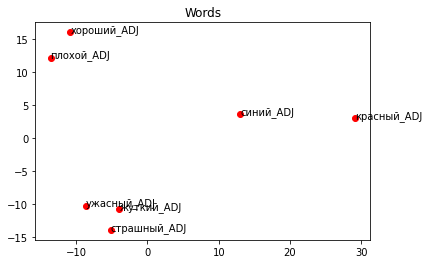

In [52]:
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

#### Оценка

Существуют специальные датасеты для оценки качества дистрибутивных моделей. Основных два: один измеряет точность решения задач на аналогии, а второй используется для оценки коэффициента семантической близости.

#### Word Similarity

Этот метод заключается в том, чтобы оценить, насколько представления о семантической близости слов в модели соотносятся с "представлениями" людей.

| слово 1    | слово 2    | близость |
|------------|------------|----------|
| кошка      | собака     | 0.7      | 
| чашка      | кружка     | 0.9      | 

Для каждой пары слов из заранее заданного датасета мы можем посчитать косинусное расстояние, и получить список таких значений близости. При этом у нас уже есть список значений близостей, сделанный людьми. Мы можем сравнить эти два списка и понять, насколько они похожи (например, посчитав корреляцию). Эта мера схожести должна говорить о том, насколько модель хорошо моделирует расстояния о слова.

#### Аналогии

Другая популярная задача для "внутренней" оценки называется задачей поиска аналогий. Как мы уже разбирали выше, с помощью простых арифметических операций мы можем модифицировать значение слова. Если заранее собрать набор слов-модификаторов, а также слов, которые мы хотим получить в результаты модификации, то на основе подсчёта количества "попаданий" в желаемое слово мы можем оценить, насколько хорошо работает модель.

В качестве слов-модификатор мы можем использовать семантические аналогии. Скажем, если у нас есть некоторое отношение "страна-столица", то для оценки модели мы можем использовать пары наподобие "Россия-Москва", "Норвегия-Осло", и т.д. Датасет будет выглядеть следующм образом:

| слово 1    | слово 2    | отношение     | 
|------------|------------|---------------|
| Россия     | Москва     | страна-столица| 
| Норвегия   | Осло       | страна-столица|

Рассматривая случайные две пары из этого набора, мы хотим, имея триплет (Россия, Москва, Норвегия) хотим получить слово "Осло", т.е. найти такое слово, которое будет находиться в том же отношении со словом "Норвегия", как "Россия" находится с Москвой.

[Датасеты для русского языка](https://rusvectores.org/static/testsets/) можно скачать на странице с моделями на RusVectores.